In [13]:
import os

import sklearn.svm
from sklearn.model_selection import train_test_split 

import numpy as np
import matplotlib.pyplot as plt


In [14]:
## 从文件中读取图片储存在np数组中
def get_npdata():
    Image_data = []
    Image_label = []
    cwd = 'F:/Git/terrain_recognition/Terrain8/'
    classes = {'Asphalt','Dirt','Floor','Grass','Gravel','Rock','Sand','Wood chips'}
    for index, name in enumerate(classes):
        class_path = cwd + name + '/'
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            im = plt.imread(img_path)

            Image_data.append(im)
            Image_label.append(name)
        
    X_data = np.array(Image_data)
    Y_label = np.array(Image_label)
    return X_data, Y_label

In [15]:
X_data ,Y_label = get_npdata()

In [16]:
## 读取展示相关图像
def plot_images(image_data,image_labels):
    fig, axes = plt.subplots(8,8,figsize = (8,8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image_data[i],cmap='binary', interpolation='nearest')
        ax.text(0.05,0.05,str(image_labels[i]),transform=ax.transAxes, color='red')

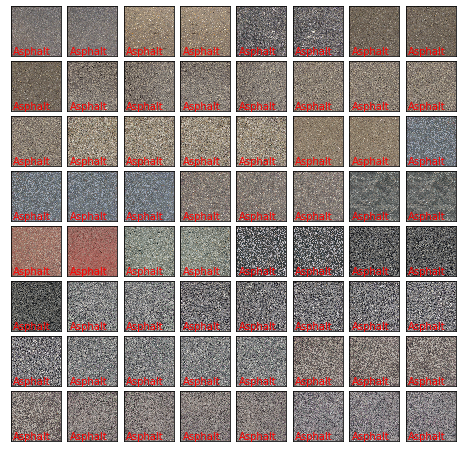

In [12]:
plot_images(X_data,Y_label)

In [ ]:
#将28*28拓展成一维矩阵，slearn可以处理
nsamples, n_length, n_width, n_channel = X_data.shape
d2_X_data = X_data.reshape(nsamples,n_length*n_width*n_channel)

In [ ]:
X_tr,X_te,Y_tr,Y_te = train_test_split(d2_X_data,Y_label,test_size=0.4, random_state=0)

In [ ]:
svc_clf = sklearn.svm.SVC(probability=True)
svc_clf.fit(X_tr, Y_tr)

y_pre = svc_clf.predict(X_te)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pre,Y_te)